# Logistic Regression Model

In [1]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import pandas as pd
import numpy as np
from functions import load_all, plot_one_site, predict_one_site, save_is_storm
from features import z_score_normalized_flow, trend, rolling_mean, midday

## Select the Site and load the data

In [2]:
chosen_site = "CHSB"
data = load_all().set_index("DateTime").sort_index()
data = data[data["Site"] == chosen_site]

Could not parse fie: HBF_WQual_Level4_labeled-Copy1.csv
Could not parse fie: CLGB.UPPERLabeledByFlowrate.csv
Could not parse fie: TPB_WQual_Level4_labeled-Copy1.csv
Could not parse fie: WHB_WQual_Level4_labeled-Copy1.csv
Could not parse fie: MCQ_WQual_Level4_labeled-Copy1.csv
Could not parse fie: CLGBLabeledByFlowrate.csv
Could not parse fie: CLGB.AGLabeledByFlowrate.csv


/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (51) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Could not parse fie: BDC_WQual_Level4_labeled-Copy1.csv
Could not parse fie: BEF_WQual_Level4_labeled-Copy1.csv
Could not parse fie: PTEBLabeledByFlowrate.csv
Could not parse fie: SBM_WQual_Level4_labeled-Copy1.csv
Could not parse fie: GOF_WQual_Level4_labeled-Copy1.csv
Could not parse fie: DBBLabeledByFlowrate.csv
Could not parse fie: LabeledByPrecipitation.csv
Could not parse fie: MooreLabeledByFlowrate.csv
Could not parse fie: LMP_WQual_Level4_labeled-Copy1.csv
Could not parse fie: CHSBLabeledByFlowrate.csv
Could not parse fie: OMPDLabeledByFlowrate.csv


/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Could not parse fie: BRDSLabeledByFlowrate.csv
Could not parse fie: DCF_WQual_Level4_labeled-Copy1.csv
Could not parse fie: OGSLabeledByFlowrate.csv


In [3]:
# LabeledByPrecipitation.csv .... use as ground truth instead

labels = pd.read_csv("LabeledByPrecipitation.csv") 

In [4]:
data = data.reset_index()

In [5]:
data["DateTime"] = pd.to_datetime(data["DateTime"], format='%Y-%m-%d %H:%M:%S')
    
labels["DateTime"] = pd.to_datetime(labels["DateTime"], format= '%Y-%m-%d %H:%M:%S')
    
labels["DateTime"] = labels["DateTime"].dt.round('15min')
    
indexes = data.set_index("DateTime").index.intersection(labels.set_index("DateTime").index)
    
labels = labels[labels["DateTime"].isin(indexes)]

data = data[data["DateTime"].isin(indexes)].set_index("DateTime")

labels = labels["is_storm"]
    

In [6]:
r = rolling_mean(data)
t = trend(data)
z = z_score_normalized_flow(data)

m = midday(data)

/Users/dokeeffe15/Senior Project For Storm Events/features.py:40: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  return rolling.apply(lambda d: d[5:].mean() - d[:5].mean())


In [7]:
frame = {"z-score": z, "trend": t, "rolling_mean": r, "flow": data.reset_index()["Q.cms"], "midday": m, "is_storm": labels}
features = pd.DataFrame(frame)

In [8]:
features = features[features['z-score'].notna()]

In [9]:
features = features[features['trend'].notna()]

In [10]:
features = features[features['flow'].notna()]

In [11]:
labels = features["is_storm"]

In [12]:
features = features.drop("is_storm", 1)

In [13]:
features_trainx = features.to_numpy()[: round(len(features) * 0.8)]

In [14]:
features_testx = features.to_numpy()[round(len(features) * 0.8) :]

In [15]:
labels_trainy = labels.to_numpy()[: round(len(labels) * 0.8)]

In [16]:
labels_testy = labels.to_numpy()[round(len(labels) * 0.8) :]

In [17]:
x_train, y_train = features_trainx, labels_trainy
x_test, y_test = features_testx, labels_testy

In [18]:
logisticRegr = LogisticRegression(solver='lbfgs')

In [19]:
logisticRegr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
predictions = logisticRegr.predict(x_test)

In [21]:
# Use score method to get accuracy of model
score = logisticRegr.score(x_test, y_test)
print(score)

0.7237762237762237


In [22]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[193  49]
 [ 30  14]]


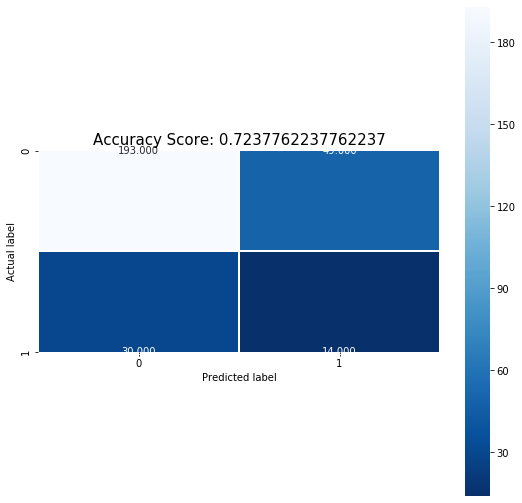

In [23]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);